<a href="https://colab.research.google.com/github/getfitwithapurv/recommendor-final-/blob/main/Recommender_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
cd = pd.read_csv('https://raw.githubusercontent.com/getfitwithapurv/recommendor-final-/main/olist_customers_dataset.csv')
opd = pd.read_csv('https://raw.githubusercontent.com/getfitwithapurv/recommendor-final-/main/olist_order_payments_dataset.csv')
oid = pd.read_csv('https://raw.githubusercontent.com/getfitwithapurv/recommendor-final-/main/olist_order_items_dataset.csv')
pdd = pd.read_csv('https://raw.githubusercontent.com/getfitwithapurv/recommendor-final-/main/olist_products_dataset.csv')
pnd = pd.read_csv('https://raw.githubusercontent.com/getfitwithapurv/recommendor-final-/main/product_category_name_translation.csv')

In [9]:
cd_oid = cd.join(oid,how = 'left')
cd_oid_opd = cd_oid.merge(opd, on = 'order_id', how = 'left')
cd_oid_opd_pdd = cd_oid_opd.merge(pdd, on = 'product_id', how = 'left')
cd_oid_opd_pdd_pnd = cd_oid_opd_pdd.merge(pnd, on = 'product_category_name', how ='left')

In [10]:
df = cd_oid_opd_pdd_pnd[['customer_id', 'customer_unique_id','order_id', 'seller_id','product_id','product_category_name_english', 'customer_city', 'customer_state', 'price', 'freight_value','payment_value','product_weight_g', 'product_length_cm','product_height_cm','product_width_cm']]
df

,customer_id,customer_unique_id,order_id,seller_id,product_id,product_category_name_english,customer_city,customer_state,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,franca,SP,58.90,13.29,72.19,650.0,28.0,9.0,14.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,e5f2d52b802189ee658865ca93d83a8f,pet_shop,sao bernardo do campo,SP,239.90,19.93,259.83,30000.0,50.0,30.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,sao paulo,SP,199.00,17.87,216.87,3050.0,33.0,13.0,33.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,7634da152a4610f1595efa32f14722fc,perfumery,mogi das cruzes,SP,12.99,12.79,25.78,200.0,16.0,10.0,15.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,ac6c3623068f30de03045865e4e10089,garden_tools,campinas,SP,199.90,18.14,218.04,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103801,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,e18cc7fc5eb938dd26feb68acbf88642,dc317f341ab0e22f39acbd9dbf9b4a1f,28ce57ecf4afba85e6020ec0209cada9,cool_stuff,sao paulo,SP,249.90,69.21,319.11,5650.0,73.0,73.0,20.0
103802,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,e18cd51191ffbe2bca934d1d13805164,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,taboao da serra,SP,75.00,20.02,190.04,2600.0,50.0,10.0,30.0
103803,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,e18cd51191ffbe2bca934d1d13805164,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,fortaleza,CE,75.00,20.02,190.04,2600.0,50.0,10.0,30.0
103804,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e18d0e097ef9cdd7894ed1b82a2b7479,c42fd8e4d47dfb18ce5222f2dd7752f9,41171e11f920c47deb1809edda2bf09d,furniture_decor,canoas,RS,26.00,10.96,36.96,200.0,16.0,16.0,16.0


In [11]:

#considering customer_id for training which will over fit the data giving high variance/overfitting the model
X1 = df[['product_id','product_category_name_english','customer_id', 'customer_unique_id', 'seller_id','customer_city', 'customer_state','price','freight_value', 'payment_value','product_weight_g', 'product_length_cm','product_height_cm','product_width_cm']]
X1 = X1.dropna()
X1 #training dataset building

,product_id,product_category_name_english,customer_id,customer_unique_id,seller_id,customer_city,customer_state,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,48436dade18ac8b2bce089ec2a041202,franca,SP,58.90,13.29,72.19,650.0,28.0,9.0,14.0
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,dd7ddc04e1b6c2c614352b383efe2d36,sao bernardo do campo,SP,239.90,19.93,259.83,30000.0,50.0,30.0,40.0
2,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,5b51032eddd242adc84c38acab88f23d,sao paulo,SP,199.00,17.87,216.87,3050.0,33.0,13.0,33.0
3,7634da152a4610f1595efa32f14722fc,perfumery,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,9d7a1d34a5052409006425275ba1c2b4,mogi das cruzes,SP,12.99,12.79,25.78,200.0,16.0,10.0,15.0
4,ac6c3623068f30de03045865e4e10089,garden_tools,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,df560393f3a51e74553ab94004ba5c87,campinas,SP,199.90,18.14,218.04,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103801,28ce57ecf4afba85e6020ec0209cada9,cool_stuff,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,dc317f341ab0e22f39acbd9dbf9b4a1f,sao paulo,SP,249.90,69.21,319.11,5650.0,73.0,73.0,20.0
103802,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,955fee9216a65b617aa5c0531780ce60,taboao da serra,SP,75.00,20.02,190.04,2600.0,50.0,10.0,30.0
103803,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,955fee9216a65b617aa5c0531780ce60,fortaleza,CE,75.00,20.02,190.04,2600.0,50.0,10.0,30.0
103804,41171e11f920c47deb1809edda2bf09d,furniture_decor,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,c42fd8e4d47dfb18ce5222f2dd7752f9,canoas,RS,26.00,10.96,36.96,200.0,16.0,16.0,16.0


In [12]:
 X1.groupby('customer_state').count().reset_index()

,customer_state,product_id,product_category_name_english,customer_id,customer_unique_id,seller_id,customer_city,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,AC,86,86,86,86,86,86,86,86,86,86,86,86,86
1,AL,433,433,433,433,433,433,433,433,433,433,433,433,433
2,AM,148,148,148,148,148,148,148,148,148,148,148,148,148
3,AP,69,69,69,69,69,69,69,69,69,69,69,69,69
4,BA,3478,3478,3478,3478,3478,3478,3478,3478,3478,3478,3478,3478,3478
5,CE,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386,1386
6,DF,2182,2182,2182,2182,2182,2182,2182,2182,2182,2182,2182,2182,2182
7,ES,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109,2109
8,GO,2076,2076,2076,2076,2076,2076,2076,2076,2076,2076,2076,2076,2076
9,MA,771,771,771,771,771,771,771,771,771,771,771,771,771


In [13]:
#Encoding City
city1 = X1.groupby('customer_city').sum().reset_index()
city1 = city1[['customer_city', 'payment_value']]
city1.columns = ['customer_city', 'payment_city']

In [14]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 710 kB/s 


In [15]:
import category_encoders as ce

In [16]:
city1_encoded = X1.merge(city1, on = 'customer_city', how ='left')
encoder=ce.TargetEncoder(cols='customer_city') 
city1_encoded['customer_city1_encoded'] = encoder.fit_transform(city1_encoded['customer_city'],city1_encoded['payment_city'])

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [17]:
#Encoding state
state1 = X1.groupby('customer_state').sum().reset_index()
state1 = state1[['customer_state', 'payment_value']]
state1.columns = ['customer_state', 'payment_state']

In [18]:
state1_encoded = city1_encoded.merge(state1, on = 'customer_state', how ='left')
encoder=ce.TargetEncoder(cols='customer_state') 
state1_encoded['customer_state1_encoded'] = encoder.fit_transform(state1_encoded['customer_state'],state1_encoded['payment_state']) 


In [19]:
state1_encoded

,product_id,product_category_name_english,customer_id,customer_unique_id,seller_id,customer_city,customer_state,price,freight_value,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_city,customer_city1_encoded,payment_state,customer_state1_encoded
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,48436dade18ac8b2bce089ec2a041202,franca,SP,58.90,13.29,72.19,650.0,28.0,9.0,14.0,35241.78,35241.78,7458064.05,7458064.05
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,dd7ddc04e1b6c2c614352b383efe2d36,sao bernardo do campo,SP,239.90,19.93,259.83,30000.0,50.0,30.0,40.0,163895.33,163895.33,7458064.05,7458064.05
2,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,5b51032eddd242adc84c38acab88f23d,sao paulo,SP,199.00,17.87,216.87,3050.0,33.0,13.0,33.0,2745623.55,2745623.55,7458064.05,7458064.05
3,7634da152a4610f1595efa32f14722fc,perfumery,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,9d7a1d34a5052409006425275ba1c2b4,mogi das cruzes,SP,12.99,12.79,25.78,200.0,16.0,10.0,15.0,76508.38,76508.38,7458064.05,7458064.05
4,ac6c3623068f30de03045865e4e10089,garden_tools,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,df560393f3a51e74553ab94004ba5c87,campinas,SP,199.90,18.14,218.04,3750.0,35.0,40.0,30.0,274683.09,274683.09,7458064.05,7458064.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102277,28ce57ecf4afba85e6020ec0209cada9,cool_stuff,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,dc317f341ab0e22f39acbd9dbf9b4a1f,sao paulo,SP,249.90,69.21,319.11,5650.0,73.0,73.0,20.0,2745623.55,2745623.55,7458064.05,7458064.05
102278,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,955fee9216a65b617aa5c0531780ce60,taboao da serra,SP,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,49219.94,49219.94,7458064.05,7458064.05
102279,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,955fee9216a65b617aa5c0531780ce60,fortaleza,CE,75.00,20.02,190.04,2600.0,50.0,10.0,30.0,113254.85,113254.85,235832.48,235832.48
102280,41171e11f920c47deb1809edda2bf09d,furniture_decor,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,c42fd8e4d47dfb18ce5222f2dd7752f9,canoas,RS,26.00,10.96,36.96,200.0,16.0,16.0,16.0,35183.46,35183.46,962571.20,962571.20


In [20]:
#Encoding Product Category
category1 = X1.groupby('product_category_name_english').sum().reset_index()
category1 = category1[['product_category_name_english', 'payment_value']]
category1.columns = ['product_category_name_english', 'payment_category']

In [21]:
category1_encoded = state1_encoded.merge(category1, on = 'product_category_name_english', how ='left')
encoder=ce.TargetEncoder(cols='product_category_name_english') 
category1_encoded['customer_category1_encoded'] = encoder.fit_transform(category1_encoded['product_category_name_english'],category1_encoded['payment_category'])

/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
/usr/local/lib/python3.8/dist-packages/category_encoders/target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [22]:
#Encoding customer
customer1 = category1_encoded.groupby('customer_id').sum().reset_index()
customer1 = customer1[['customer_id', 'payment_value']]
customer1.columns = ['customer_id', 'customer_payment']

In [23]:
customer1_encoded = category1_encoded.merge(customer1, on = 'customer_id', how ='left')
encoder=ce.TargetEncoder(cols='customer_id') 
customer1_encoded['customer_customer1_encoded'] = encoder.fit_transform(customer1_encoded['customer_id'],customer1_encoded['customer_payment'])

In [24]:
#Encoding Product
product1 = customer1_encoded.groupby('product_id').sum().reset_index()
product1 = product1[['product_id', 'payment_value']]
product1.columns = ['product_id', 'product_price_encoded']

In [25]:
product1_encoded = customer1_encoded.merge(product1, on = 'product_id', how ='left')
encoder=ce.TargetEncoder(cols='product_id') 
product1_encoded['customer_product1_encoded'] = encoder.fit_transform(product1_encoded['product_id'], product1_encoded['product_price_encoded'])

In [26]:
#Encoding Unique Customer
unique_cust1 = product1_encoded.groupby('customer_unique_id').sum().reset_index()
unique_cust1 = unique_cust1[['customer_unique_id', 'price']]
unique_cust1.columns = ['customer_unique_id', 'unique_customer_payment']

In [27]:
unique_cust1_encoded = product1_encoded.merge(unique_cust1, on = 'customer_unique_id', how = 'left')
encoder=ce.TargetEncoder(cols='customer_unique_id') 
unique_cust1_encoded['customer_uniquecust1_encoded'] = encoder.fit_transform(unique_cust1_encoded['customer_unique_id'], unique_cust1_encoded['unique_customer_payment'])

In [28]:
#Encoding Seller
seller1 = unique_cust1_encoded.groupby('seller_id').sum().reset_index()
seller1 = seller1[['seller_id', 'payment_value']]
seller1.columns = ['seller_id', 'seller_payment']

In [29]:
seller1_encoded = unique_cust1_encoded.merge(seller1, on = 'seller_id', how = 'left')
encoder=ce.TargetEncoder(cols='seller_id') 
seller1_encoded['seller1_encoded'] = encoder.fit_transform(seller1_encoded['seller_id'], seller1_encoded['seller_payment'])

In [30]:
#parameters to train the NN
X = seller1_encoded[['customer_city1_encoded','customer_state1_encoded','customer_product1_encoded', 'payment_value', 'seller1_encoded', 'customer_uniquecust1_encoded', 'freight_value','product_weight_g','product_length_cm','product_height_cm','product_width_cm']].dropna()
X

,customer_city1_encoded,customer_state1_encoded,customer_product1_encoded,payment_value,seller1_encoded,customer_uniquecust1_encoded,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,35241.78,7458064.05,808.317273,72.19,16419.110000,152.021246,13.29,650.0,28.0,9.0,14.0
1,163895.33,7458064.05,4933.281526,259.83,11574.910000,152.021246,19.93,30000.0,50.0,30.0,40.0
2,2745623.55,7458064.05,1311.997499,216.87,5936.972236,152.021246,17.87,3050.0,33.0,13.0,33.0
3,76508.38,7458064.05,1364.457126,25.78,2556.247077,152.021246,12.79,200.0,16.0,10.0,15.0
4,274683.09,7458064.05,2306.244202,218.04,3455.690000,152.021246,18.14,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
102277,2745623.55,7458064.05,1443.156992,319.11,21204.410000,152.021246,69.21,5650.0,73.0,73.0,20.0
102278,49219.94,7458064.05,57242.680000,190.04,202191.560000,152.021246,20.02,2600.0,50.0,10.0,30.0
102279,113254.85,235832.48,57242.680000,190.04,202191.560000,152.021246,20.02,2600.0,50.0,10.0,30.0
102280,35183.46,962571.20,1383.830178,36.96,1138.254496,152.021246,10.96,200.0,16.0,16.0,16.0


In [31]:
#label
y = category1_encoded[['price']].dropna()
y #training target data

,price
0,58.90
1,239.90
2,199.00
3,12.99
4,199.90
...,...
102277,249.90
102278,75.00
102279,75.00
102280,26.00


In [32]:
#Splitting training and testing data
X_train, X_test, y_train, y_test = X.iloc[0:80000, :], X.iloc[80000:, :], y.iloc[0:80000], y.iloc[80000:]

In [33]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [34]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# importing Tensorflow 
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [36]:
#defining the model and adding neural network layers
from keras import regularizers
model = keras.Sequential(([
    layers.Dense(55, activation='relu', input_shape=[11], kernel_regularizer=regularizers.l2(0.01)),
    # layers.Dropout(0.30, seed=None),
    layers.Dense(55, activation='swish'),
    layers.Dense(55, activation='relu'),
    layers.Dense(55, activation='relu'),
    layers.Dense(55, activation='relu'),
    layers.Dense(1)
]))

In [37]:
#compiling the model
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'mean_squared_error', optimizer = optimizer, metrics=['mae'])

In [39]:
#Training the model
history = model.fit(X_train_norm, y_train, epochs = 500, validation_split = 0.2, use_multiprocessing = True)

Epoch 1/500
2000/2000 [==============================] - 17s 8ms/step - loss: 10942.2627 - mae: 53.3869 - val_loss: 11405.9521 - val_mae: 53.9240
Epoch 2/500
2000/2000 [==============================] - 7s 4ms/step - loss: 9902.5664 - mae: 51.2188 - val_loss: 11575.1533 - val_mae: 55.6083
Epoch 3/500
2000/2000 [==============================] - 6s 3ms/step - loss: 9447.1670 - mae: 50.9058 - val_loss: 12059.5713 - val_mae: 52.7141
Epoch 4/500
2000/2000 [==============================] - 6s 3ms/step - loss: 9018.9014 - mae: 50.2036 - val_loss: 9737.5869 - val_mae: 48.3784
Epoch 5/500
2000/2000 [==============================] - 6s 3ms/step - loss: 8510.1846 - mae: 48.8780 - val_loss: 10978.6436 - val_mae: 56.7389
Epoch 6/500
2000/2000 [==============================] - 6s 3ms/step - loss: 8132.2183 - mae: 48.2318 - val_loss: 9160.8252 - val_mae: 47.5937
Epoch 7/500
2000/2000 [==============================] - 6s 3ms/step - loss: 7904.7598 - mae: 47.5855 - val_loss: 9022.0635 - val_mae: 4

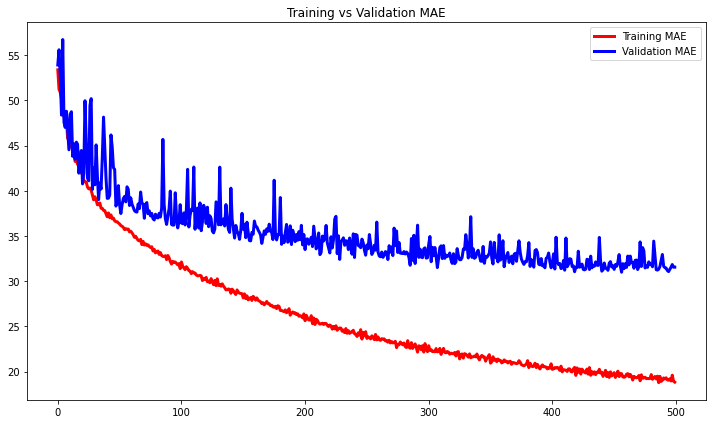

In [40]:
import matplotlib.pyplot as plt
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(figsize=(10,6))
num_epochs = model_history.shape[0]
ax.plot(np.arange(0, num_epochs), model_history["mae"], 
        label="Training MAE", lw=3, color='r')
ax.plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="Validation MAE", lw=3, color='b')
ax.legend()
plt.title('Training vs Validation MAE')
plt.tight_layout()
plt.savefig("train vs validation.png")
plt.show()

In [41]:
y_pred = model.predict(X_test_norm)

697/697 [==============================] - 1s 1ms/step


In [42]:
# colors = {'y_test': 'pink', 'y_pred': 'blue'}
y_test = y_test.to_numpy()

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error
score = r2_score(y_test, y_pred)
mean_error = mean_absolute_error(y_test, y_pred)
score, mean_error

(0.7554356235389603, 31.714728804072063)

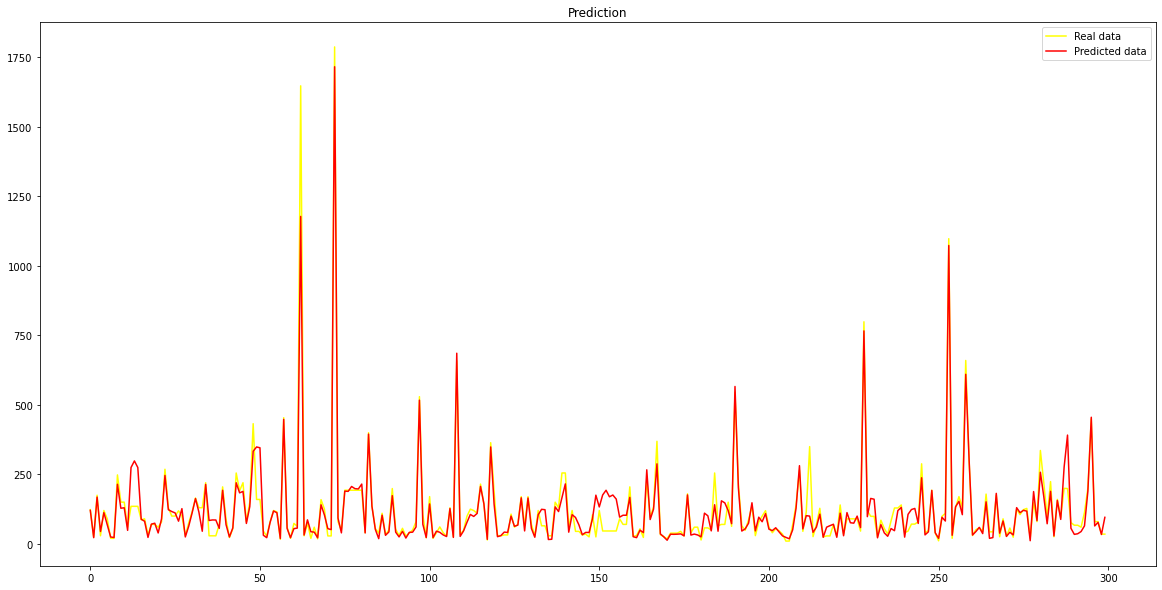

In [45]:
figure = plt.figure(figsize = (20,10))
plt.plot(y_test[300:600], color = 'yellow', label = 'Real data')
plt.plot(y_pred[300:600], color = 'red', label = 'Predicted data')
plt.title('Prediction')

plt.legend()
plt.savefig('prediction.png')
plt.show() # xaxis no. of products

In [46]:
test = y_test - y_pred
test1= pd.DataFrame(test)
test1.describe()

,0
count,22282.000000
mean,-3.059949
std,90.931150
min,-1939.314648
25%,-8.155843
50%,3.080590
75%,14.305386
max,1998.137536


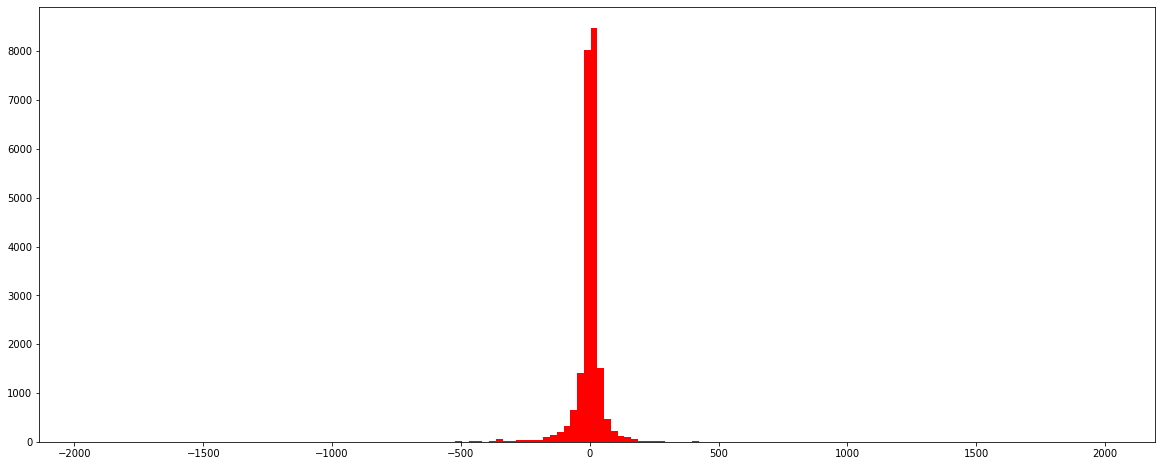

In [47]:
figure = plt.figure(figsize = (20,8))
plt.hist((y_test-y_pred), color = 'red', bins = 150)
plt.show()